In [1]:
import pandas as mulgul_engpd

mulgul_eng = mulgul_engpd.read_csv('mulgul_eng.csv',nrows=30000) # read English data
mulgul_eng

,text,label
0,comment expected barack obama members fyf fuky...,1
1,post votes hillary already,1
2,demonstrators gathered last night exercising c...,1
3,dozen politically active pastors came private ...,0
4,rs sarmat missile dubbed satan replace ss flie...,1
...,...,...
29995,washington reuters u president donald trump fa...,0
29996,thank goodness mandatory financial disclosures...,1
29997,washington reuters vice president mike pence t...,0
29998,share joe giambrone everything printed year do...,1


In [2]:
import pandas as mulgul_engpd

mulgul_ger = mulgul_engpd.read_csv('mulgul_german.csv',nrows=30000)
mulgul_ger

,Body,Fake
0,sondierungsgespr che union spd endeten komprom...,1
1,medizinisch offiziell best tigt milit r rztlic...,1
2,z he verhandlungen freien demokraten k nnen zu...,1
3,treibt immer sp t nacht herum joachim sauer be...,1
4,parteivorstand dr ckt nochmal auge nachdem noa...,1
...,...,...
29995,krisengebeutelte europ ische automobilmarkt ta...,0
29996,us kabelkonzern liberty global bieterrennen ka...,0
29997,angesichts tiefen rezession euro zone fasst ez...,0
29998,commerzbank fallen n chsten jahren voraussicht...,0


In [3]:
mulgul_eng['label'].value_counts()

0    15432
1    14568
Name: label, dtype: int64

In [4]:
mulgul_ger['Fake'].value_counts()

0    27960
1     2040
Name: Fake, dtype: int64

In [5]:
mulgul_engX = mulgul_eng.drop('label',axis=1)
mulgul_engX

,text
0,comment expected barack obama members fyf fuky...
1,post votes hillary already
2,demonstrators gathered last night exercising c...
3,dozen politically active pastors came private ...
4,rs sarmat missile dubbed satan replace ss flie...
...,...
29995,washington reuters u president donald trump fa...
29996,thank goodness mandatory financial disclosures...
29997,washington reuters vice president mike pence t...
29998,share joe giambrone everything printed year do...


In [6]:
mulgul_engY = mulgul_eng['label']
mulgul_engY

0        1
1        1
2        1
3        0
4        1
        ..
29995    0
29996    1
29997    0
29998    1
29999    0
Name: label, Length: 30000, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as mulgul_engcvt

mulgul_eng_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_engX = mulgul_eng_AY.fit_transform(mulgul_eng['text'].values.astype('U')).toarray()

In [8]:
print(mulgul_engX)

[[0.57892077 0.2611502  0.0672667  ... 0.01424629 0.06197869 0.00488827]
 [0.39981329 0.39977331 0.         ... 0.         0.26913124 0.        ]
 [0.4510741  0.24806595 0.         ... 0.02669597 0.02277278 0.        ]
 ...
 [0.49078218 0.26848079 0.05059424 ... 0.00420957 0.04488672 0.        ]
 [0.52501742 0.28544968 0.04668153 ... 0.00699124 0.07222846 0.00799625]
 [0.51391005 0.24052959 0.0296293  ... 0.01294247 0.04416186 0.01973731]]


In [9]:
mulgul_gerX = mulgul_ger.drop('Fake',axis=1)
mulgul_gerX

,Body
0,sondierungsgespr che union spd endeten komprom...
1,medizinisch offiziell best tigt milit r rztlic...
2,z he verhandlungen freien demokraten k nnen zu...
3,treibt immer sp t nacht herum joachim sauer be...
4,parteivorstand dr ckt nochmal auge nachdem noa...
...,...
29995,krisengebeutelte europ ische automobilmarkt ta...
29996,us kabelkonzern liberty global bieterrennen ka...
29997,angesichts tiefen rezession euro zone fasst ez...
29998,commerzbank fallen n chsten jahren voraussicht...


In [10]:
mulgul_gerY = mulgul_ger['Fake']
mulgul_gerY

0        1
1        1
2        1
3        1
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Fake, Length: 30000, dtype: int64

In [11]:
mulgul_ger_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_gerX = mulgul_ger_AY.fit_transform(mulgul_ger['Body'].values.astype('U')).toarray()

In [12]:
print(mulgul_gerX)

[[0.43000932 0.20495771 0.04822856 ... 0.00622332 0.01132334 0.03620037]
 [0.51844098 0.16040163 0.05442561 ... 0.0133067  0.00807052 0.03440158]
 [0.53275549 0.1717627  0.03202569 ... 0.         0.         0.07284391]
 ...
 [0.47660857 0.19210243 0.07052332 ... 0.0037656  0.         0.09005003]
 [0.44799407 0.2315475  0.14598533 ... 0.         0.01418283 0.06045607]
 [0.48860776 0.19906242 0.06635856 ... 0.         0.         0.08452394]]


In [13]:
from imblearn.over_sampling import RandomOverSampler as mulgul_gerrmo
from collections import Counter as mulgul_gerctr
print('In starting mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))
Mdd= mulgul_gerrmo()
mulgul_gerX, mulgul_gerY = Mdd.fit_resample(mulgul_gerX, mulgul_gerY)
print('After applying random oversampling mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))

In starting mulgul_ger datashape Counter({0: 27960, 1: 2040})
After applying random oversampling mulgul_ger datashape Counter({1: 27960, 0: 27960})


In [14]:
from sklearn.model_selection import train_test_split as mulgul_engnst
from sklearn.metrics import classification_report as mulgul_engcla
from sklearn.metrics import confusion_matrix as mulgul_engcon
from sklearn.metrics import ConfusionMatrixDisplay as mulgul_engcma
import time as mulgul_engtim
from sklearn.model_selection import GridSearchCV as mulgul_enggri

In [15]:
eng_rast= 42
eng_tze=0.5
# {{{test,validation=50%,50%}}}
mulgul_engXL, mulgul_engXE, mulgul_engYL, mulgul_engYE = mulgul_engnst(mulgul_engX, mulgul_engY, test_size= eng_tze, random_state= eng_rast)

In [16]:
print(mulgul_engXL.shape)
print(mulgul_engXE.shape)

(15000, 27)
(15000, 27)


In [17]:
import warnings as mulgul_engww
mulgul_engww.filterwarnings("ignore")

#### ML algorithm

#### svm

In [18]:
from sklearn.svm import SVC as mulgul_engsvet

mulgul_Pa = {'kernel': ['sigmoid','linear','poly','rbf'],
            'gamma': ['scale','auto'],
            'C': [1.0,2.0,3.0,4.0,5.0]}

mulgul_Pa_Vbs = mulgul_engsvet(random_state= eng_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[2000:2100],mulgul_gerY[2000:2100])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
{'C': 3.0, 'gamma': 'scale', 'kernel': 'poly'}
Best Score-mulgul_ger :  0.79



 training duration : 0.01062154769897461 

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      7768
           1       1.00      0.01      0.01      7232

    accuracy                           0.52     15000
   macro avg       0.76      0.50      0.35     15000
weighted avg       0.75      0.52      0.36     15000


 validation duration : 0.1525282859802246 



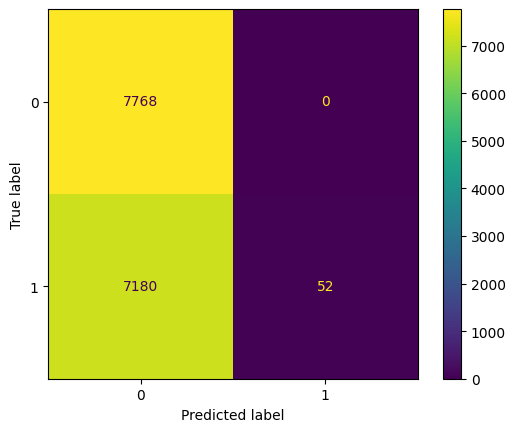

In [19]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll1 = mulgul_engsvet(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll1.fit(mulgul_gerX[2000:2500],mulgul_gerY[2000:2500])
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll1.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      7664
           1       0.97      0.01      0.02      7336

    accuracy                           0.52     15000
   macro avg       0.74      0.50      0.35     15000
weighted avg       0.74      0.52      0.36     15000


 testing duration : 0.13841676712036133 



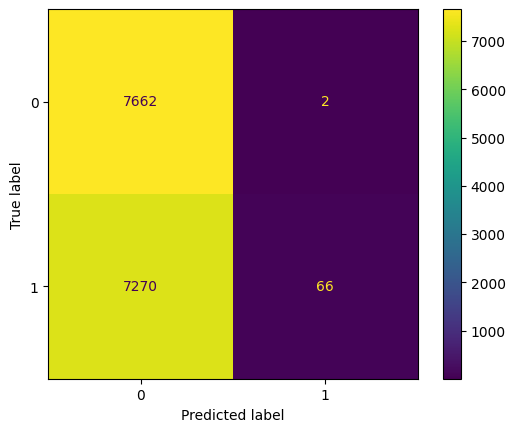

In [20]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll1.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB as mulgulnvbs

mulgul_Pa = {'var_smoothing': [1e-9,1e-7,1e-5,1e-3,1e-1]}

mulgul_Pa_Vbs = mulgulnvbs()
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'var_smoothing': 0.1}
Best Score-mulgul_ger :  0.759



 training duration : 0.0316774845123291 

              precision    recall  f1-score   support

           0       0.80      0.00      0.00      7768
           1       0.48      1.00      0.65      7232

    accuracy                           0.48     15000
   macro avg       0.64      0.50      0.33     15000
weighted avg       0.65      0.48      0.31     15000


 validation duration : 0.08418893814086914 



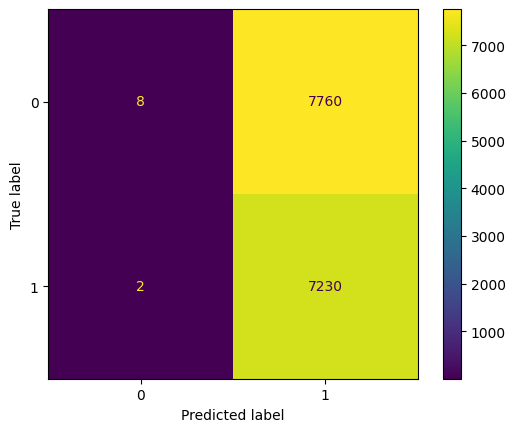

In [22]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll2 = mulgulnvbs(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll2.fit(mulgul_gerX,mulgul_gerY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll2.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.62      0.00      0.00      7664
           1       0.49      1.00      0.66      7336

    accuracy                           0.49     15000
   macro avg       0.56      0.50      0.33     15000
weighted avg       0.56      0.49      0.32     15000


 testing duration : 0.12186026573181152 



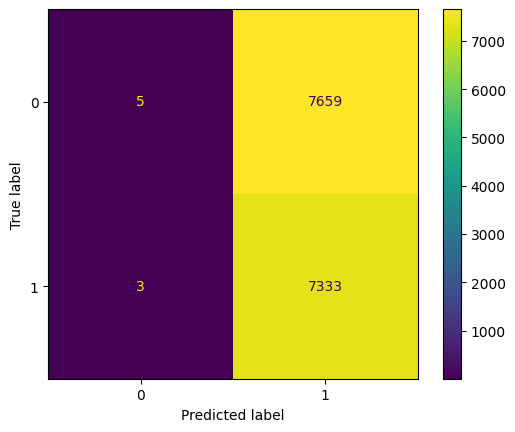

In [23]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll2.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier as mulguldesi

mulgul_Pa = {'max_features': ['sqrt','auto','log2'],
            'criterion': ['entropy','gini','log_loss'],
            'splitter': ['random','best']}

mulgul_Pa_Vbs = mulguldesi(random_state= eng_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
Best Score-mulgul_ger :  0.692



 training duration : 0.3911552429199219 

              precision    recall  f1-score   support

           0       0.55      0.69      0.61      7768
           1       0.54      0.39      0.45      7232

    accuracy                           0.55     15000
   macro avg       0.55      0.54      0.53     15000
weighted avg       0.55      0.55      0.54     15000


 validation duration : 0.08051705360412598 



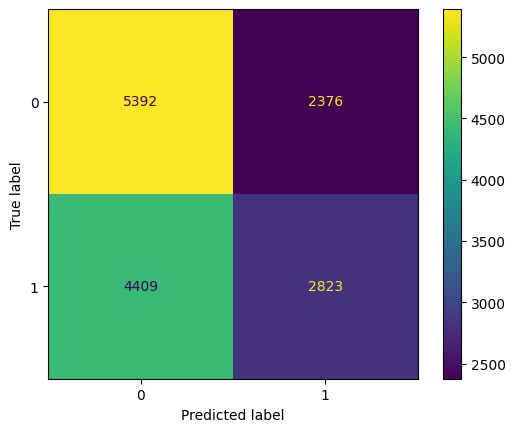

In [25]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll3 = mulguldesi(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll3.fit(mulgul_gerX,mulgul_gerY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll3.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.55      0.70      0.61      7664
           1       0.55      0.39      0.46      7336

    accuracy                           0.55     15000
   macro avg       0.55      0.54      0.54     15000
weighted avg       0.55      0.55      0.54     15000


 testing duration : 0.08423495292663574 



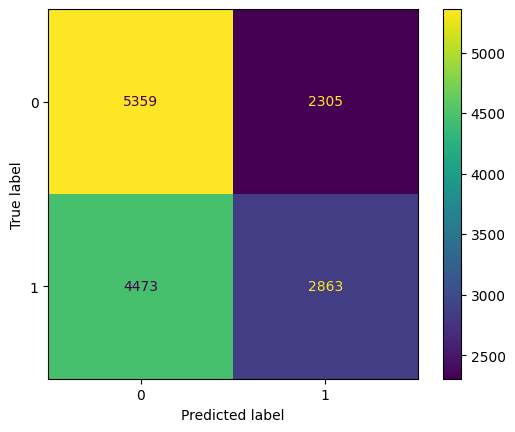

In [26]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll3.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier as mulgulromf

mulgul_Pa = {'criterion': ['log_loss','entropy','gini'],
            'n_estimators': [100,200,300,400,500],
            'max_features': ['log2','sqrt',None]}

mulgul_Pa_Vbs = mulgulromf(random_state= eng_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[2000:2100],mulgul_gerY[2000:2100])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Best Score-mulgul_ger :  0.76



 training duration : 54.50257134437561 

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      7768
           1       0.69      0.00      0.01      7232

    accuracy                           0.52     15000
   macro avg       0.60      0.50      0.35     15000
weighted avg       0.60      0.52      0.36     15000


 validation duration : 0.4334726333618164 



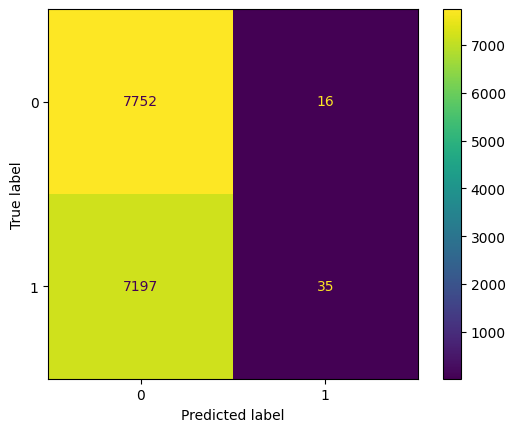

In [28]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll4 = mulgulromf(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll4.fit(mulgul_gerX,mulgul_gerY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll4.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      7664
           1       0.74      0.01      0.01      7336

    accuracy                           0.51     15000
   macro avg       0.62      0.50      0.34     15000
weighted avg       0.62      0.51      0.35     15000


 testing duration : 0.5531253814697266 



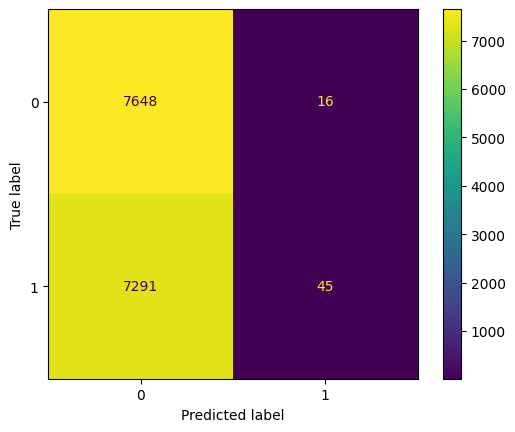

In [29]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll4.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier as mulgulkgh

mulgul_Pa = {'weights': ['distance','uniform'],
            'n_neighbors': [5,6,7,8,9],
            'algorithm': ['ball_tree','kd_tree','auto','brute']}

mulgul_Pa_Vbs = mulgulkgh()
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
Best Score-mulgul_ger :  0.7723333333333333



 training duration : 0.2113194465637207 

              precision    recall  f1-score   support

           0       0.64      0.17      0.27      7768
           1       0.50      0.90      0.64      7232

    accuracy                           0.52     15000
   macro avg       0.57      0.53      0.46     15000
weighted avg       0.57      0.52      0.45     15000


 validation duration : 87.24151825904846 



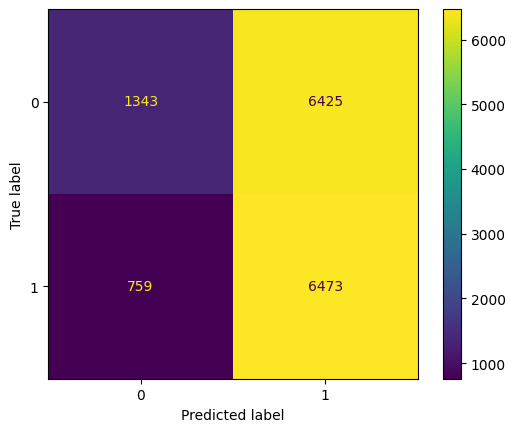

In [31]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll5 = mulgulkgh(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll5.fit(mulgul_gerX,mulgul_gerY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll5.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.64      0.17      0.27      7664
           1       0.51      0.90      0.65      7336

    accuracy                           0.53     15000
   macro avg       0.58      0.54      0.46     15000
weighted avg       0.58      0.53      0.46     15000


 testing duration : 84.25165867805481 



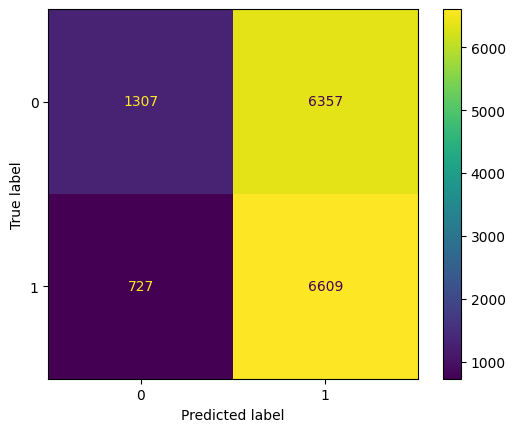

In [32]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll5.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### MLP

In [33]:
from sklearn.neural_network import MLPClassifier as mulgulmlt

mulgul_Pa = {'solver': ['lbfgs','adam','sgd'],
            'learning_rate': ['constant','adaptive','invscaling'],
            'activation': ['tanh','relu','logistic','identity']}

mulgul_Pa_Vbs = mulgulmlt(random_state= eng_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_gerX[:100],mulgul_gerY[:100])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_ger : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best Score-mulgul_ger :  1.0



 training duration : 143.00339460372925 

              precision    recall  f1-score   support

           0       0.82      0.02      0.05      7768
           1       0.49      0.99      0.65      7232

    accuracy                           0.49     15000
   macro avg       0.65      0.51      0.35     15000
weighted avg       0.66      0.49      0.34     15000


 validation duration : 0.2251417636871338 



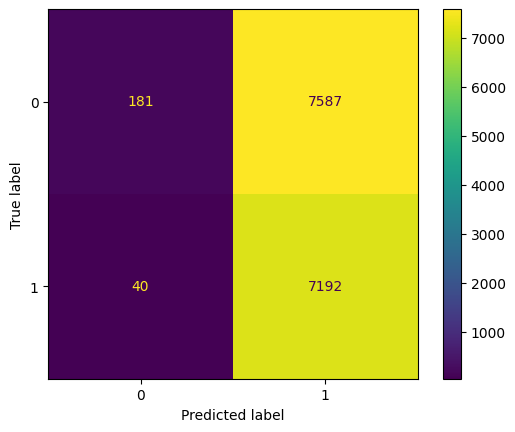

In [34]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll6 = mulgulmlt(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll6.fit(mulgul_gerX,mulgul_gerY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll6.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.75      0.02      0.04      7664
           1       0.49      0.99      0.66      7336

    accuracy                           0.50     15000
   macro avg       0.62      0.51      0.35     15000
weighted avg       0.62      0.50      0.34     15000


 testing duration : 0.2190408706665039 



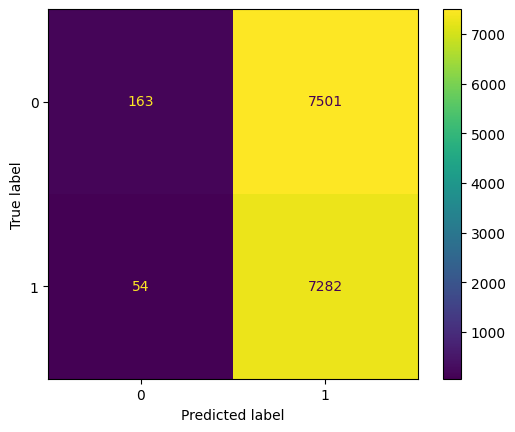

In [35]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll6.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")